In [1]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d unmoved/30k-cats-and-dogs-150x150-greyscale

Dataset URL: https://www.kaggle.com/datasets/unmoved/30k-cats-and-dogs-150x150-greyscale
License(s): CC0-1.0
 99% 132M/133M [00:08<00:00, 20.0MB/s]
100% 133M/133M [00:08<00:00, 15.7MB/s]


In [3]:
!unzip /content/30k-cats-and-dogs-150x150-greyscale.zip

Streaming output truncated to the last 5000 lines.
  inflating: Animal Images/dogs/dog.441.jpg  
  inflating: Animal Images/dogs/dog.4410.jpg  
  inflating: Animal Images/dogs/dog.4411.jpg  
  inflating: Animal Images/dogs/dog.4412.jpg  
  inflating: Animal Images/dogs/dog.4413.jpg  
  inflating: Animal Images/dogs/dog.4414.jpg  
  inflating: Animal Images/dogs/dog.4415.jpg  
  inflating: Animal Images/dogs/dog.4416.jpg  
  inflating: Animal Images/dogs/dog.4417.jpg  
  inflating: Animal Images/dogs/dog.4418.jpg  
  inflating: Animal Images/dogs/dog.4419.jpg  
  inflating: Animal Images/dogs/dog.442.jpg  
  inflating: Animal Images/dogs/dog.4420.jpg  
  inflating: Animal Images/dogs/dog.4421.jpg  
  inflating: Animal Images/dogs/dog.4422.jpg  
  inflating: Animal Images/dogs/dog.4423.jpg  
  inflating: Animal Images/dogs/dog.4424.jpg  
  inflating: Animal Images/dogs/dog.4425.jpg  
  inflating: Animal Images/dogs/dog.4426.jpg  
  inflating: Animal Images/dogs/dog.4427.jpg  
  inflating

In [4]:
import os
import numpy as np
from PIL import Image

def load_and_process_images(directory):
  """Loads and processes images from a directory.

  Args:
    directory: The path to the directory containing the images.

  Returns:
    A NumPy array containing the processed images.
  """

  images = []
  for filename in os.listdir(directory):
    if filename.endswith(".jpg") or filename.endswith(".png"):
      img_path = os.path.join(directory, filename)
      img = Image.open(img_path)
      img = img.resize((150, 150))  # Resize if needed
      img = np.array(img)  # Convert to NumPy array
      images.append(img)
  return np.array(images)


# Load and process images for cats and dogs
cat_images = load_and_process_images("/content/Animal Images/cats")
dog_images = load_and_process_images("/content/Animal Images/dogs")

# Now you have the images in NumPy arrays: cat_images and dog_images
print("Cat images shape:", cat_images.shape)
print("Dog images shape:", dog_images.shape)


Cat images shape: (15059, 150, 150)
Dog images shape: (15002, 150, 150)


In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

# Create labels for cats and dogs (0 for cats, 1 for dogs)
cat_labels = np.zeros(len(cat_images))
dog_labels = np.ones(len(dog_images))

# Combine images and labels
all_images = np.concatenate((cat_images, dog_images))
all_labels = np.concatenate((cat_labels, dog_labels))

# Shuffle the data
shuffled_indices = np.random.permutation(len(all_images))
all_images = all_images[shuffled_indices]
all_labels = all_labels[shuffled_indices]

# Split data into training and testing sets
train_split = 0.8
num_train = int(len(all_images) * train_split)
train_images = all_images[:num_train]
train_labels = all_labels[:num_train]
test_images = all_images[num_train:]
test_labels = all_labels[num_train:]

# Normalize pixel values to the range [0, 1]
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0
"""
# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 1)), # Changed input shape to (150, 150, 1)
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification (cat or dog)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)"""


"\n# Define the CNN model\nmodel = models.Sequential([\n    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 1)), # Changed input shape to (150, 150, 1)\n    layers.MaxPooling2D((2, 2)),\n    layers.Conv2D(64, (3, 3), activation='relu'),\n    layers.MaxPooling2D((2, 2)),\n    layers.Conv2D(128, (3, 3), activation='relu'),\n    layers.MaxPooling2D((2, 2)),\n    layers.Flatten(),\n    layers.Dense(128, activation='relu'),\n    layers.Dense(1, activation='sigmoid')  # Binary classification (cat or dog)\n])\n\n# Compile the model\nmodel.compile(optimizer='adam',\n              loss='binary_crossentropy',\n              metrics=['accuracy'])\n\n# Train the model\nmodel.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))\n\n# Evaluate the model\ntest_loss, test_acc = model.evaluate(test_images, test_labels)\nprint('Test accuracy:', test_acc)"

In [6]:
# Define the CNN model with dropout
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),  # Add dropout layer with a rate of 0.5
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Add dropout layer with a rate of 0.5
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
752/752 ━━━━━━━━━━━━━━━━━━━━ 34s 33ms/step - accuracy: 0.5844 - loss: 0.6699 - val_accuracy: 0.6878 - val_loss: 0.5868
Epoch 2/10
752/752 ━━━━━━━━━━━━━━━━━━━━ 26s 23ms/step - accuracy: 0.7122 - loss: 0.5658 - val_accuracy: 0.7416 - val_loss: 0.5235
Epoch 3/10
752/752 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.7590 - loss: 0.4999 - val_accuracy: 0.7658 - val_loss: 0.4910
Epoch 4/10
752/752 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.7834 - loss: 0.4573 - val_accuracy: 0.7835 - val_loss: 0.4661
Epoch 5/10
752/752 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.8149 - loss: 0.4038 - val_accuracy: 0.8016 - val_loss: 0.4280
Epoch 6/10
752/752 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.8335 - loss: 0.3729 - val_accuracy: 0.8034 - val_loss: 0.4222
Epoch 7/10
752/752 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.8532 - loss: 0.3364 - val_accuracy: 0.8184 - val_loss: 0.4151
Epoch 8/10
752/752 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.8636 - loss: 0.3117 - 

In [7]:
from sklearn.metrics import classification_report

# Get predictions for the test set
y_pred = (model.predict(test_images) > 0.5).astype("int32")

# Generate the classification report
print(classification_report(test_labels, y_pred))


188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
              precision    recall  f1-score   support

         0.0       0.83      0.82      0.83      3060
         1.0       0.82      0.82      0.82      2953

    accuracy                           0.82      6013
   macro avg       0.82      0.82      0.82      6013
weighted avg       0.82      0.82      0.82      6013



188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


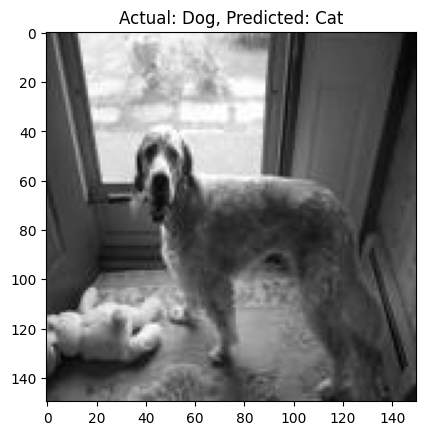

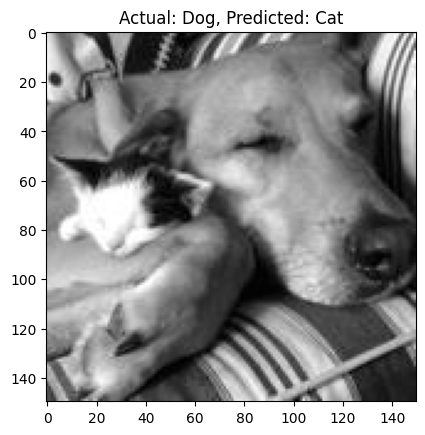

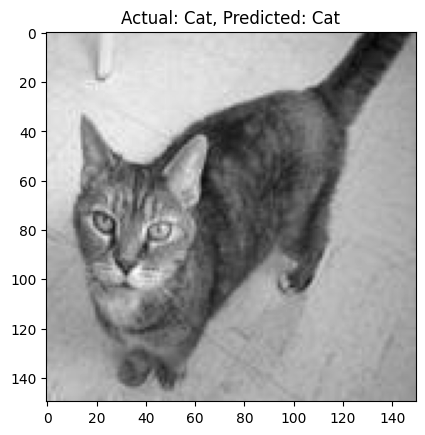

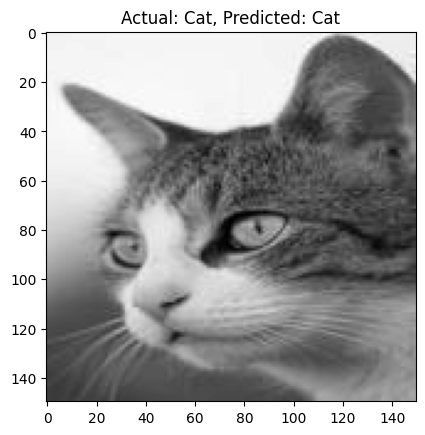

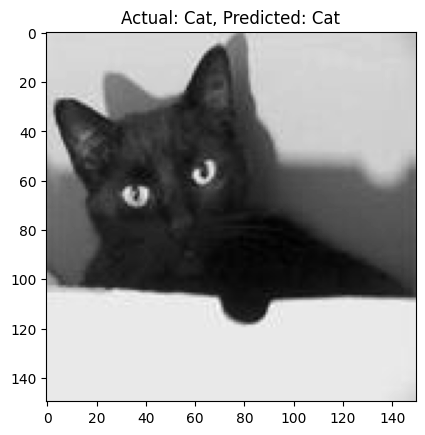

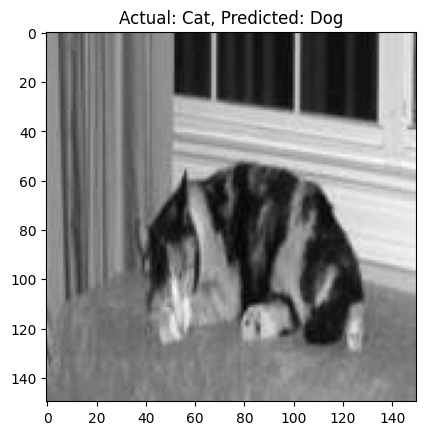

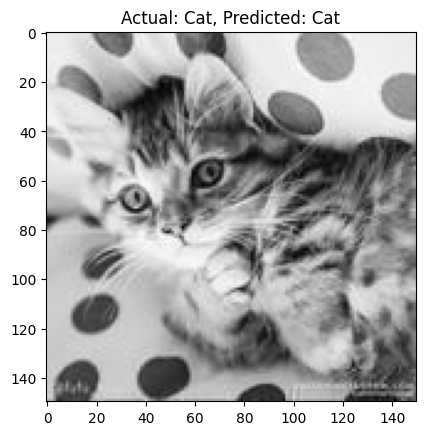

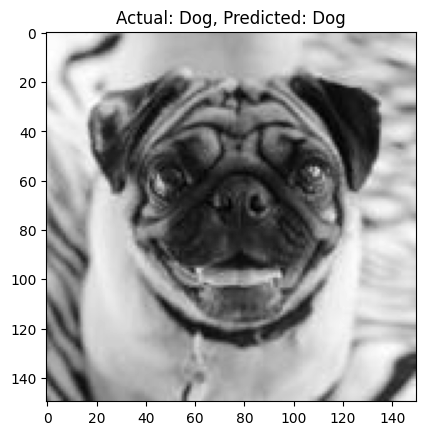

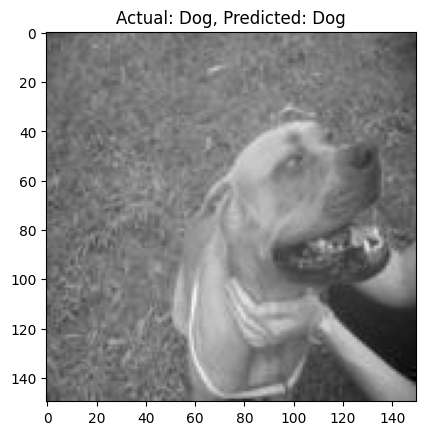

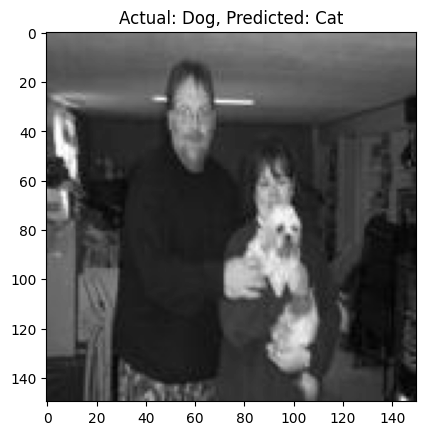

In [8]:
import matplotlib.pyplot as plt

# Get predictions for the test set
y_pred = (model.predict(test_images) > 0.5).astype("int32")

# Create a function to display the image and prediction
def display_prediction(image, actual_label, predicted_label):
  plt.imshow(image, cmap='gray')
  plt.title(f"Actual: {'Cat' if actual_label == 0 else 'Dog'}, Predicted: {'Cat' if predicted_label == 0 else 'Dog'}")
  plt.show()

# Display some examples
num_examples_to_display = 10
for i in range(num_examples_to_display):
  display_prediction(test_images[i], test_labels[i], y_pred[i])
